In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [2]:
all_genes = pd.read_csv('extracted_data/GxG_filled.csv', sep = ',', index_col = 0)
all_genes

ExN = pd.read_csv('extracted_data/ExN_filled.csv', sep = ',', index_col = 0)

R2:  0.25900598256323004
RMSE: 0.061061849853973955


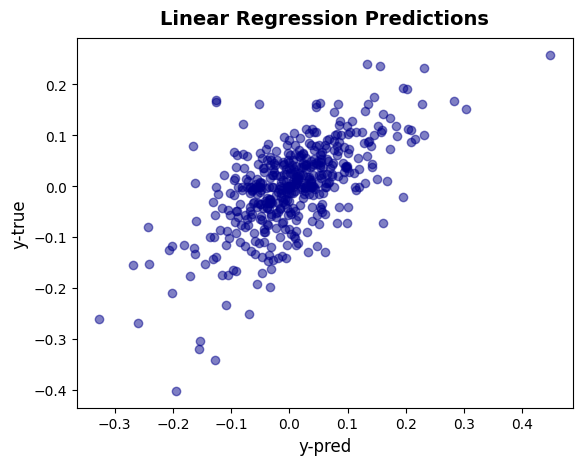

In [3]:
random.seed(35)

target_column = random.choice(ExN.columns)  # Randomly pick a column name

X = ExN.drop(columns=[target_column])  # Features (all columns except the target)
y = ExN[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.8222217300110428


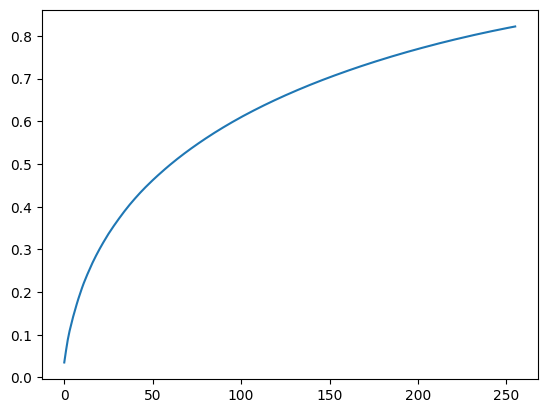

In [4]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [5]:
dims = 256
ExN_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExN_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.089647,0.284517,0.251542,-0.024190,0.041246,0.172038,0.383980,-0.165929,-0.148178,-0.086030,...,-0.101901,-0.037585,-0.028905,0.003251,-0.044334,-0.016535,-0.003682,0.059027,0.060195,-0.040772
1,0.262110,0.001618,-0.030819,0.288486,-0.078028,0.423518,0.112510,0.168457,-0.084864,-0.051626,...,0.086525,0.022261,-0.072769,0.029130,0.034964,0.057730,0.097480,-0.033177,0.038751,0.061132
2,-0.039177,0.091307,0.159298,-0.121938,0.070206,0.271300,0.298166,0.009784,-0.026210,-0.061118,...,0.005100,0.002706,0.020369,0.039071,0.052256,0.051851,0.008567,-0.062996,0.027995,-0.036402
3,0.072572,0.319995,0.250220,0.149623,-0.002703,-0.004617,0.197937,-0.278776,-0.017664,-0.087090,...,0.000479,0.019631,0.055095,0.052185,0.100846,-0.061480,0.036506,0.015380,-0.108736,-0.064959
4,-0.651154,-0.277368,-0.324390,0.555922,0.042274,0.080273,-0.114063,-0.118038,-0.112336,1.379230,...,-0.133791,0.016705,-0.013141,-0.068168,0.091453,0.074518,-0.019514,0.192565,-0.009929,0.096941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,-1.221413,-0.061827,-0.196655,0.327041,0.930926,0.030260,-0.089484,0.183171,-0.471046,0.249517,...,0.016294,0.028657,0.023181,-0.004724,0.057022,-0.006530,-0.077121,-0.026894,-0.079560,-0.014230
3418,-1.583235,-0.255598,-0.203169,0.504927,0.742557,0.470655,-0.325342,0.283348,-0.492225,0.230634,...,0.002662,-0.086447,0.120825,0.003128,-0.069482,-0.132101,-0.001385,-0.084894,0.069274,-0.045158
3419,-1.350685,-0.268163,-0.071411,0.364420,0.942312,-0.020787,-0.531543,0.307893,-0.327020,0.333653,...,0.103472,0.074148,-0.070815,0.015883,-0.023900,0.168866,0.133854,0.066559,-0.018694,0.055351
3420,-0.120242,-0.068904,-0.000025,0.043794,0.022196,0.133464,0.103095,-0.041072,0.005568,0.034201,...,0.027959,0.003154,-0.019668,0.017817,-0.018629,-0.027377,0.012360,-0.007895,-0.011460,-0.010659


R2:  0.40914754066517633
RMSE: 0.05452581051161904


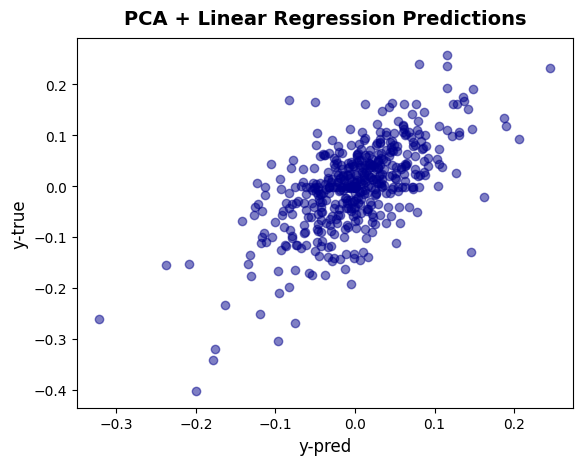

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ExN_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

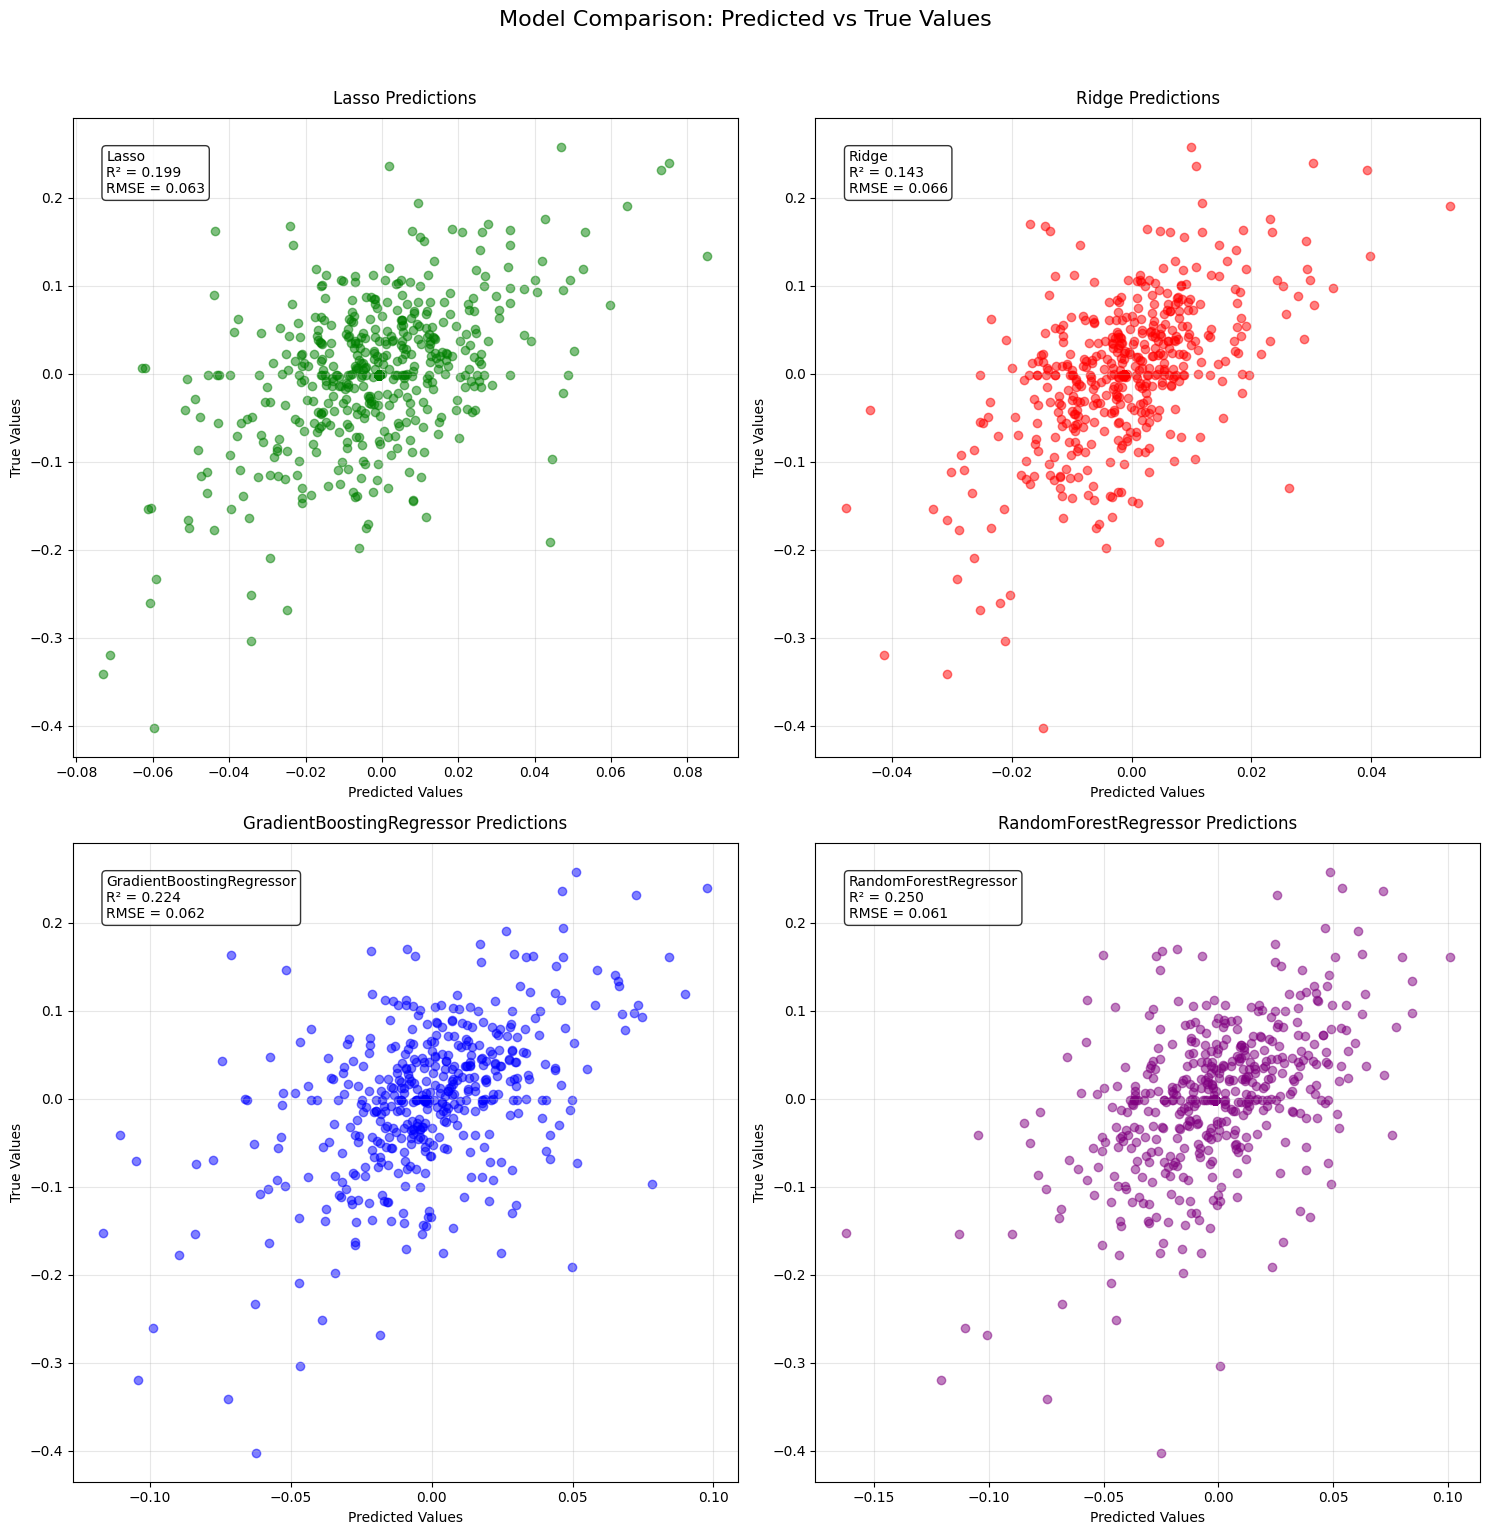

In [7]:
predictive_models = [  
                      Lasso(alpha=0.0004),
                      Ridge(alpha=200.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [8]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

ModuleNotFoundError: No module named 'tensorflow'